# Choose K

In [7]:
import pandas as pd
import sklearn as sc
from sklearn.cluster import KMeans
from sklearn import metrics

data = pd.read_csv("../data/one_hot_items.csv")
data = data.drop("order_id", axis = 1)

# Measure Performance
for k in xrange(8, 20):
    kmeans_model = KMeans(n_clusters=k, n_init=10, max_iter=300, tol=0.0001)


    kmeans_model.fit(data)
    data["cluster"] = kmeans_model.predict(data)

    data_sample = data.sample(10000)
    print "k:", k
    print "calinski score", metrics.calinski_harabaz_score(data.drop("cluster", axis = 1), data.cluster, ) 
    print "silhouette score", metrics.silhouette_score(data_sample.drop("cluster", axis = 1), data_sample.cluster, metric='euclidean')

k: 8
calinski score 9776.93356223091
silhouette score 0.4463780458415631
k: 9
calinski score 9224.972530376888
silhouette score 0.461032935294549
k: 10
calinski score 8574.382745606244
silhouette score 0.470534666144568
k: 11
calinski score 8117.057094739078
silhouette score 0.4744409518415078
k: 12
calinski score 7460.58256892776
silhouette score 0.4707412885617353
k: 13
calinski score 7325.6632490122665
silhouette score 0.48976124220049094
k: 14
calinski score 6722.232477973413
silhouette score 0.47608279905323214
k: 15
calinski score 6681.138846625796
silhouette score 0.48570661009045446
k: 16
calinski score 6461.858076892482
silhouette score 0.49427551469193576
k: 17
calinski score 6266.4350267773625
silhouette score 0.505290773911151
k: 18
calinski score 5948.807902823385
silhouette score 0.4987347618312059
k: 19
calinski score 5672.710942253061
silhouette score 0.5024037935739919


# Clustering and Decomposition

In [1]:
import pandas as pd
import sklearn as sc
from sklearn.cluster import KMeans
from sklearn import metrics

data = pd.read_csv("../data/one_hot_items.csv")
data = data.drop("order_id", axis = 1)

kmeans_model = KMeans(n_clusters=16, n_init=10, max_iter=300, tol=0.0001)
kmeans_model.fit(data)

data["cluster"] = kmeans_model.predict(data)

In [2]:
data.head()

,Apron,Bathrobe,Bedsheets,Bedspread,Blanket,Blazer,Blouse,Chef,Coat,Cover / Cushion Cover,...,T-Shirt,Tablecloth,Tie,Top,Towel,Trousers,Underwear,Vest / Waistcoat,WashnFold,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
from sklearn.decomposition import PCA, TruncatedSVD

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop("cluster", axis = 1))

svd = TruncatedSVD(n_components=2)
data_svd = svd.fit_transform(data.drop(["cluster"], axis = 1))

Populating the interactive namespace from numpy and matplotlib


/Users/keldibek/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['svd']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


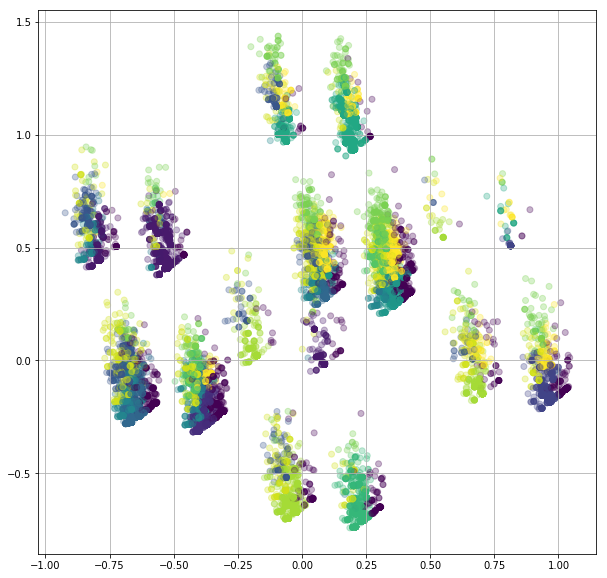

In [4]:
import matplotlib.pyplot as plt
from numpy.random import rand
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

fig, ax = plt.subplots()

ax.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.3, c = data.cluster)
#ax.set_xlim(-10, 30)
#ax.set_ylim(-10, 40)
ax.legend()
ax.grid(True)

plt.show()

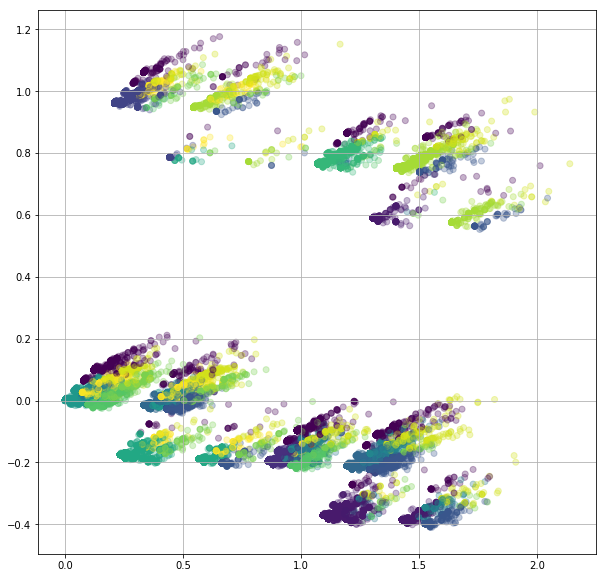

In [5]:
import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()

ax.scatter(data_svd[:, 0], data_svd[:, 1], alpha=0.3, c = data.cluster)
#ax.set_ylim(-10, 40)
ax.legend()
ax.grid(True)

plt.show()

In [6]:
data.to_csv("../data/items_with_clusters.csv", index = False)

In [25]:
import pandas as pd
import sklearn as sc
from sklearn.cluster import KMeans
from sklearn import metrics

data = pd.read_csv("../data/one_hot_items.csv")
data = data.drop("order_id", axis = 1)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# Measure Performance
for k in xrange(8, 20):
    kmeans_model = KMeans(n_clusters=k, n_init=10, max_iter=300, tol=0.0001)


    kmeans_model.fit(data_pca)
    cluster = kmeans_model.predict(data_pca)

    sample_idxs = np.random.randint(1, data_pca.shape[0], 10000)
    
    print "k:", k
    print "calinski score", metrics.calinski_harabaz_score(data_pca, cluster) 
    print "silhouette score", metrics.silhouette_score(data_pca[sample_idxs, :],
                                                       cluster[sample_idxs],
                                                       metric='euclidean')

k: 8
calinski score 87683.88648595507
silhouette score 0.7491951891454575
k: 9
calinski score 98201.53895626622
silhouette score 0.7686588181039656
k: 10
calinski score 112647.40848961522
silhouette score 0.7913839638926016
k: 11
calinski score 130545.55167912791
silhouette score 0.7988699753820593
k: 12
calinski score 135217.717697143
silhouette score 0.8053120173292838
k: 13
calinski score 141819.46129455988
silhouette score 0.7925001570640106
k: 14
calinski score 145720.06898652832
silhouette score 0.7760997375572233
k: 15
calinski score 157230.1296356405
silhouette score 0.7825829985508077
k: 16
calinski score 161990.05028048198
silhouette score 0.7954783740234207
k: 17
calinski score 171022.98101218353
silhouette score 0.7917990837991415
k: 18
calinski score 171843.53710859656
silhouette score 0.7904605043762751
k: 19
calinski score 170111.8050279717
silhouette score 0.7876416854166487


Populating the interactive namespace from numpy and matplotlib


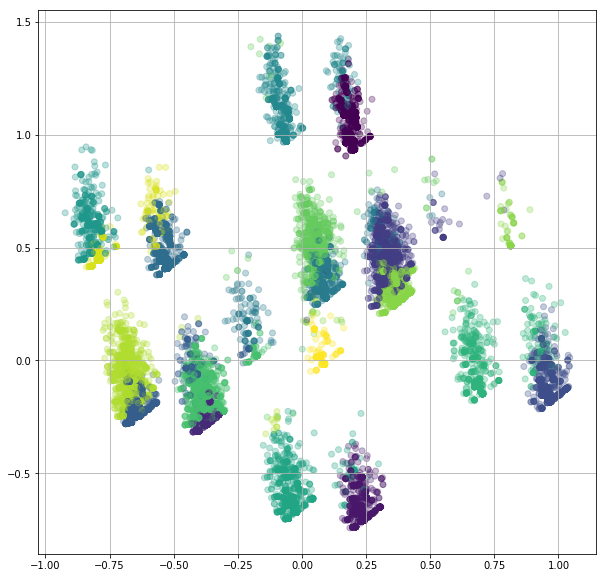

In [36]:
import matplotlib.pyplot as plt
from numpy.random import rand
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)


data = pd.read_csv("../data/one_hot_items.csv")
data = data.drop("order_id", axis = 1)

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

kmeans_model = KMeans(n_clusters=18, n_init=10, max_iter=300, tol=0.0001)
kmeans_model.fit(data_pca)
cluster = kmeans_model.predict(data_pca)

fig, ax = plt.subplots()
ax.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.3, c = cluster)
#ax.set_xlim(-10, 30)
#ax.set_ylim(-10, 40)
ax.legend()
ax.grid(True)

plt.show()

In [37]:
data["cluster"] = cluster

In [38]:
data.head()

,Apron,Bathrobe,Bedsheets,Bedspread,Blanket,Blazer,Blouse,Chef,Coat,Cover / Cushion Cover,...,T-Shirt,Tablecloth,Tie,Top,Towel,Trousers,Underwear,Vest / Waistcoat,WashnFold,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,16
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [39]:
data.to_csv("../data/items_with_clusters.csv", index = False)